# W-ASAP Workshop: Exploring SARS-CoV-2 Wastewater Data

**Welcome!** This notebook will help you explore real wastewater surveillance data from Switzerland.

In the next 30 minutes, you'll learn how to:
- Explore which variants are circulating
- Download real sequence alignments
- Query data programmatically to answer your own questions

Let's get started!

## Setup: Import Required Libraries

We'll use standard Python libraries that are pre-installed in Google Colab:
- `requests`: for making API calls
- `pandas`: for data manipulation
- `matplotlib`: for visualization

In [1]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Configure matplotlib for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ Setup complete! Ready to explore wastewater data.")

✓ Setup complete! Ready to explore wastewater data.


---
## Section 1: GenSpectrum/Swiss-Wastewater Interface

### 🔍 Explore which variants are circulating

Before diving into code, let's explore the data visually using the GenSpectrum interface.

**👉 Open this link:** [https://genspectrum.org/swiss-wastewater/covid](https://genspectrum.org/swiss-wastewater/covid)

**What you can do:**
- Browse the variant landscape over time
- Check mutation frequencies at specific genomic positions
- Validate primers against current sequences
- Diagnose why dPCR assays might be underperforming

*Take a few minutes to explore. We'll work through two exercises below.*

---

### 📝 Exercise 1: Manual Mode - Finding Nucleotide Mutations

**Your Task:**  
What are the nucleotide mutations observed for SARS-CoV-2 in **Zürich** during **November 2025** with a mean proportion between **15% and 30%**?  
What is the **lowest genomic reference position**?

**Instructions:**
1. Open the [GenSpectrum Swiss Wastewater interface](https://genspectrum.org/swiss-wastewater/covid)
2. Set the following filters:
   - **Location:** Zürich (ZH)
   - **Date Range:** November 1-30, 2025
   - **Analysis Mode:** Manual
   - **Sequence Type:** Nucleotide
3. Look for mutations with mean proportions between 15-30%
4. Identify the mutation at the lowest genomic position

<details>
<summary><b>👁️ Click to reveal answer</b></summary>

### Answer: **T15939C**

The mutation **T15939C** (position 5939) has a mean proportion within the target range.

**🔗 Direct link to the query:**  
[View in GenSpectrum](https://genspectrum.org/swiss-wastewater/covid?locationName=Z%C3%BCrich+%28ZH%29&samplingDate=2025-11-01--2025-11-30&granularity=day&analysisMode=manual&sequenceType=nucleotide&)

**📊 Visualization:**  
![Answer 1 - Nucleotide mutations in Zürich](https://raw.githubusercontent.com/gordonkoehn/wasap-workshop/main/answers/answer01.png)

</details>

---

### 📝 Exercise 2: Variant Explorer - Tracking BA.3.2*

**Your Task:**  
Is **BA.3.2*** present in **Basel** during **November-December 2025**?  
What are the signature mutations and their prevalence?

**Instructions:**
1. Switch to **Variant Explorer** mode
2. Set the following filters:
   - **Location:** Basel (BS)
   - **Date Range:** November 1 - December 31, 2025
   - **Analysis Mode:** Variant
   - **Sequence Type:** Nucleotide
   - **Variant:** BA.3.2*
   - **Min Jaccard Index:** 0.5 (to be more lenient with signature mutations)
3. Look for signature mutations of this variant

<details>
<summary><b>👁️ Click to reveal answer - Nucleotide Mutations</b></summary>

### Answer: Yes, BA.3.2* is present!

**Key signature mutations:**
- **T22054A**
- **C23625A**

**Prevalence:** ~14% on November 23rd

**🔗 Direct link to the query:**  
[View in GenSpectrum](https://genspectrum.org/swiss-wastewater/covid?locationName=Basel+%28BS%29&samplingDate=2025-11-01--2025-12-31&granularity=day&analysisMode=variant&sequenceType=nucleotide&variant=BA.3.2*&minProportion=0.8&minCount=15&minJaccard=0.5&)

**📊 Visualization:**  
![Answer 2 - BA.3.2* nucleotide mutations in Basel](https://raw.githubusercontent.com/gordonkoehn/wasap-workshop/main/answers/answer02.png)

</details>

---

#### 🎯 Bonus: Link to Clinical Sequences

**Try this:**  
Click on the mutation **T22054A** (it should be underlined/clickable) to link out to CovSpectrum.

**Question:** In which clinical sequences is this mutation found? What lineages of BA.3.2* contain it?

<details>
<summary><b>👁️ Click to reveal bonus answer</b></summary>

### Bonus Answer:

**🔗 Link:** [CovSpectrum T22054A](https://cov-spectrum.org/explore/World/AllSamples/AllTimes/variants?nucMutations=T22054A)

**Found in lineage:** BA.3.2.2 (2.86%)

This shows you how wastewater data connects to clinical sequencing databases!

</details>

---

#### 🧬 Now Try With Amino Acids

**Your Task:**  
Repeat the same query as above, but switch **Sequence Type** to **Amino Acid**.  
Which amino acid changes have been seen?

**Hint:** You can filter by gene in the plot.

<details>
<summary><b>👁️ Click to reveal answer - Amino Acid Mutations</b></summary>

### Answer:

**Key amino acid changes:**
- **ORF1a:I3944L**
- **S:K795T**
- **S:A852K**

**🔗 Direct link to the query:**  
[View in GenSpectrum](https://genspectrum.org/swiss-wastewater/covid?locationName=Basel+%28BS%29&samplingDate=2025-11-01--2025-12-31&granularity=day&analysisMode=variant&sequenceType=amino+acid&variant=BA.3.2*&minProportion=0.8&minCount=15&minJaccard=0.5&)

**📊 Visualization:**  
![Answer 4 - BA.3.2* amino acid mutations in Basel](https://raw.githubusercontent.com/gordonkoehn/wasap-workshop/main/answers/answer04.png)

**Note:** These amino acid changes in the Spike protein (S:) could affect antibody binding or viral fitness!

</details>

---

### ✅ Section 1 Complete!

**What you've learned:**
- How to query nucleotide and amino acid mutations
- How to use Manual Mode vs Variant Explorer
- How to track specific lineages over time and location
- How wastewater data connects to clinical sequences (CovSpectrum)

**Key takeaway:** The GenSpectrum interface lets you explore real wastewater data without writing any code—perfect for quick checks and hypothesis generation!

---

---
## Section 2: W-ASAP Loculus for Downloading Alignments

### Get your hands on real sequences

**What is Loculus?**  
Loculus is the database backend that stores all the wastewater sequencing data. You can download alignments, inspect metadata, and access raw data—usually available the day after processing!

**👉 Open this link:** [https://db.wasap.genspectrum.org/](https://db.wasap.genspectrum.org/)

**How to download alignment data:**
1. Browse available samples by location and date
2. Filter by your region or time period of interest
3. Download the alignment files (.bam format)
4. Use these alignments in your own bioinformatics pipelines!

**Where to find sequences:**
- Latest uploads appear within 24 hours of processing
- Metadata includes: collection date, location, sequencing coverage
- You can trace back to raw reads if needed

*Explore the interface and download a sample if you'd like!*

---
## Section 3: LAPIS + Loculus APIs for Programmatic Queries

Now let's write some code! The following cells show you how to:
- Query variant frequencies over time
- Check primer coverage
- Fetch sample metadata

All queries use **live APIs**—you're getting real data in real-time.

### Cell 3a: LAPIS Query – Count a Set of Mutations Over Time

**Goal:** Visualize how specific mutations change over time in Swiss wastewater.

**What this does:**
- Queries the LAPIS API for read counts for a list of mutations
- Groups data by time period
- Visualizes as a heatmap

The api reference is here https://lapis.wasap.genspectrum.org/swagger-ui/index.html

This is to show you where the data is for any queries, how they are made.

📡 Querying the LAPIS API...
URL: https://lapis.wasap.genspectrum.org/component/nucleotideMutationsOverTime
Mutations: ['T22054A', 'C23625A', 'A23063T']
Location: Basel (BS)

💻 Equivalent curl command:
curl -X POST 'https://lapis.wasap.genspectrum.org/component/nucleotideMutationsOverTime' \
  -H 'Content-Type: application/json' \
  -d '{
  "filters": {
    "locationName": "Basel (BS)"
  },
  "includeMutations": [
    "T22054A",
    "C23625A",
    "A23063T"
  ],
  "dateRanges": [
    {
      "dateFrom": "2025-10-01",
      "dateTo": "2025-10-31"
    },
    {
      "dateFrom": "2025-11-01",
      "dateTo": "2025-11-30"
    },
    {
      "dateFrom": "2025-12-01",
      "dateTo": "2025-12-31"
    }
  ],
  "dateField": "samplingDate"
}'

✓ Data received successfully!
Found 3 mutations and 3 date ranges


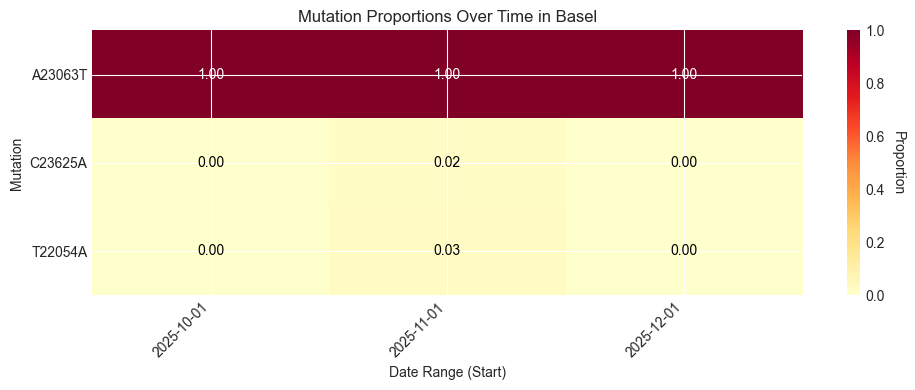


📊 Data table:
mutation  date_from    date_to  count  coverage  proportion
 T22054A 2025-10-01 2025-10-31      0    133686    0.000000
 T22054A 2025-11-01 2025-11-30   4586    172525    0.026582
 T22054A 2025-12-01 2025-12-31      0     16245    0.000000
 C23625A 2025-10-01 2025-10-31      1    127806    0.000008
 C23625A 2025-11-01 2025-11-30   2883    177198    0.016270
 C23625A 2025-12-01 2025-12-31      0     15416    0.000000
 A23063T 2025-10-01 2025-10-31  73893     73928    0.999527
 A23063T 2025-11-01 2025-11-30  76145     76196    0.999331
 A23063T 2025-12-01 2025-12-31  10147     10151    0.999606

💡 Try modifying:
  - Change 'mutations' to track different positions
  - Adjust dateRanges to explore different time periods
  - Change locationName to 'Zürich (ZH)' or other locations


In [2]:
# Cell 3a: Track Specific Mutations Over Time
# Let's track 3 interesting mutations in Basel over the last few months

# Step 1: Define our query parameters
BASE_URL = "https://lapis.wasap.genspectrum.org"
endpoint = "/component/nucleotideMutationsOverTime"

# Pick 3 mutations to track (these are from Exercise 2!)
mutations = ["T22054A", "C23625A", "A23063T"]

# Set up our query
payload = {
    "filters": {"locationName": "Basel (BS)"},
    "includeMutations": mutations,
    "dateRanges": [
        {"dateFrom": "2025-10-01", "dateTo": "2025-10-31"},
        {"dateFrom": "2025-11-01", "dateTo": "2025-11-30"},
        {"dateFrom": "2025-12-01", "dateTo": "2025-12-31"}
    ],
    "dateField": "samplingDate"
}

print("📡 Querying the LAPIS API...")
print(f"URL: {BASE_URL}{endpoint}")
print(f"Mutations: {mutations}")
print(f"Location: Basel (BS)")
print()

# Equivalent curl command (try this in your terminal!):
print("💻 Equivalent curl command:")
print(f"""curl -X POST '{BASE_URL}{endpoint}' \\
  -H 'Content-Type: application/json' \\
  -d '{json.dumps(payload, indent=2)}'""")
print()

# Step 2: Make the API request
try:
    response = requests.post(f"{BASE_URL}{endpoint}", json=payload, timeout=30)
    response.raise_for_status()  # Raise error for bad status codes
    api_response = response.json()
    print("✓ Data received successfully!")
    
    # Step 3: Parse the response
    # The API returns: {"data": {mutations: [...], dateRanges: [...], data: [[...]]}}
    data = api_response.get("data", {})
    api_mutations = data.get("mutations", [])
    api_date_ranges = data.get("dateRanges", [])
    data_matrix = data.get("data", [])
    
    print(f"Found {len(api_mutations)} mutations and {len(api_date_ranges)} date ranges")
    
    # Step 4: Convert to DataFrame for easier handling
    df_data = []
    for i, mutation in enumerate(api_mutations):
        for j, date_range in enumerate(api_date_ranges):
            # Each data point contains count and coverage
            point = data_matrix[i][j] if i < len(data_matrix) and j < len(data_matrix[i]) else None
            
            if point and point.get("coverage", 0) > 0:
                proportion = point.get("count", 0) / point.get("coverage", 1)
            else:
                proportion = 0
            
            df_data.append({
                "mutation": mutation,
                "date_from": date_range["dateFrom"],
                "date_to": date_range["dateTo"],
                "count": point.get("count", 0) if point else 0,
                "coverage": point.get("coverage", 0) if point else 0,
                "proportion": proportion
            })
    
    df = pd.DataFrame(df_data)
    
    # Step 5: Create a heatmap
    # Pivot the data: mutations as rows, date ranges as columns
    pivot_df = df.pivot(index="mutation", columns="date_from", values="proportion")
    
    # Plot!
    fig, ax = plt.subplots(figsize=(10, 4))
    im = ax.imshow(pivot_df.values, cmap="YlOrRd", aspect="auto", vmin=0, vmax=1)
    
    # Configure axes
    ax.set_xticks(range(len(pivot_df.columns)))
    ax.set_xticklabels(pivot_df.columns, rotation=45, ha="right")
    ax.set_yticks(range(len(pivot_df.index)))
    ax.set_yticklabels(pivot_df.index)
    
    # Add labels
    ax.set_xlabel("Date Range (Start)")
    ax.set_ylabel("Mutation")
    ax.set_title("Mutation Proportions Over Time in Basel")
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Proportion", rotation=270, labelpad=15)
    
    # Add values as text annotations
    for i in range(len(pivot_df.index)):
        for j in range(len(pivot_df.columns)):
            value = pivot_df.values[i, j]
            text_color = "white" if value > 0.5 else "black"
            ax.text(j, i, f"{value:.2f}", ha="center", va="center", 
                   color=text_color, fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Data table:")
    print(df.to_string(index=False))
    
except requests.exceptions.RequestException as e:
    print(f"❌ Error: {e}")
    print("The API might be temporarily unavailable. Try again later!")
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    import traceback
    traceback.print_exc()

print("\n💡 Try modifying:")
print("  - Change 'mutations' to track different positions")
print("  - Adjust dateRanges to explore different time periods")
print("  - Change locationName to 'Zürich (ZH)' or other locations")

### Cell 3b: Advanced Queries – Primer Coverage & Co-occurrence

**Goal:** Use advanced LAPIS queries to check primer binding sites and find mutations that occur together.

**Use case:**  
Your dPCR assay stopped working? Let's see if mutations appeared in the primer binding sites! Or check if two signature mutations co-occur in the same samples.

---

#### 🔬 Primer Validation with Existing Tools

You can already use **GenSpectrum/Swiss-Wastewater** manually to search primer regions by listing all positions.

For example, here's the [N1 Forward Primer in GenSpectrum](https://staging.genspectrum.org/swiss-wastewater/covid?analysisMode=manual&sequenceType=nucleotide&mutations=28287G%7C28288A%7C28289C%7C28290C%7C28291C%7C28292C%7C28293A%7C28294A%7C28295A%7C28296A%7C28297T%7C28298C%7C28299A%7C28300G%7C28301C%7C28302G%7C28303A%7C28304A%7C28305A%7C28306T%7C28309A%7C28310C%7C28311C%7C28312C%7C28313C%7C28314G%7C28315C%7C28316A%7C28317T%7C28318T%7C28319A%7C28320C%7C28321G%7C28322T%7C28323T%7C28324T%7C28325G%7C28326G%7C28327T%7C28328G%7C28329G%7C28330A%7C28331C%7C28332C%7C28335C%7C28336A%7C28337G%7C28338A%7C28339T%7C28340T%7C28341C%7C28342A%7C28343A%7C28344C%7C28345T%7C28346G%7C28347G%7C28348C%7C28349A%7C28350G%7C28351T%7C28352A%7C28353A%7C28354C%7C28355C%7C28356A%7C28357G%7C28358A&) for Zürich. (Note the coords are actually slightly differnt – the paper is wrong)

**But that's a bit cumbersome!** We're experimenting with easier ways to explore genomic regions on our prototyping platform **V-Pipe Scout**.

The **Region Explorer** lets you search by just pasting in the region ranges (much more convenient):

- [N1 Forward Primer (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=28303-28322)
- [N1 Reverse Primer (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=28351-28374)
- [N1 Probe (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=28325-28348)
- [N2 Forward Primer (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=29180-29199)
- [N2 Reverse Primer (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=29228-29246)
- [N2 Probe (Basel)](https://wasap.genspectrum.org/region?region_mutation_type=Nucleotide&region_mode=Genomic+Ranges&region_start_date=2025-09-12&region_end_date=2025-11-02&region_location=Basel+%28BS%29&region_show_empty=Skip+dates+with+no+coverage&region_min_frequency=0.0&region_max_frequency=1.0&region_range_input=29204-29226)

**📄 Primer/Probe Reference:** These N1, N2, N3, and Rp primer/probe sequences were originally published by [Lu et al., 2020](https://pmc.ncbi.nlm.nih.gov/articles/PMC7392423/) in the CDC 2019-Novel Coronavirus Real-Time RT-PCR Diagnostic Panel.

---

#### 🧬 Advanced Co-occurrence Features

**For researchers familiar with amplicon protocols:**  
V-Pipe Scout's **Co-occurrence Explorer** supports advanced queries like "at least N-of-M mutations" - perfect for variant validation within specific amplicons!

**Example:** Check if BA.3.2* shows "at least 3 of 5" signature mutations in a specific amplicon:
- [Advanced Co-occurrence Query for BA.3.2*](https://wasap.genspectrum.org/cooccurrence?coocurrences_query_mode=Advanced&coocurrences_mutation_input=23149T%2C23224T%2C23311T%2C23403G%2C23436G&coocurrences_start_date=2025-10-18&coocurrences_end_date=2025-11-15&coocurrences_advanced_query=%5B3-of%3A+23149T%2C+23224T%2C+23311T%2C+23403G%2C+23436G%5D)

This uses the query: `[3-of: 23149T, 23224T, 23311T, 23403G, 23436G]`  
**Translation:** "Find samples where at least 3 out of these 5 mutations are present"

**Why is this powerful?**
- Validates variant presence even with partial amplicon coverage
- Accounts for sequencing gaps or low-coverage regions
- Useful for tracking emerging variants with incomplete mutation profiles

---

#### 📝 Simple Co-occurrence Example (Python)

Below we'll show a basic example: checking if two mutations occur together in Basel.

**Why check co-occurrence?**  
- Validate that signature mutations of a variant co-occur
- Check if mutations happen together (indicating they're on the same haplotype)
- Understand mutation linkage patterns

**Official Documentation:** [LAPIS Advanced Queries](https://lapis.cov-spectrum.org/open/v2/docs/concepts/advanced-query/)

Let's check: Do **23403G** and **23436G** co-occur in Basel?

In [ ]:
# Cell 3b: Advanced Query - Check Mutation Co-occurrence
# Let's see if 23403G and 23436G occur together in Basel samples
# This demonstrates the advancedQuery parameter for AND logic

BASE_URL = "https://lapis.wasap.genspectrum.org"
endpoint = "/sample/aggregated"

# Query 1: Samples with BOTH mutations using advancedQuery (AND logic)
# This shows the power of advanced LAPIS queries!
query_both = {
    "advancedQuery": "23403G & 23436G",  # Both must be present (AND logic)
    "locationName": "Basel (BS)",
    "samplingDateFrom": "2025-10-01",
    "samplingDateTo": "2025-11-30"
}

# Query 2: Samples with EITHER mutation (for comparison)
query_either_23403 = {
    "nucleotideMutations": ["23403G"],
    "locationName": "Basel (BS)",
    "samplingDateFrom": "2025-10-01",
    "samplingDateTo": "2025-11-30"
}

query_either_23436 = {
    "nucleotideMutations": ["23436G"],
    "locationName": "Basel (BS)",
    "samplingDateFrom": "2025-10-01",
    "samplingDateTo": "2025-11-30"
}

print("🔍 Checking mutation co-occurrence in Basel (Oct-Nov 2025)...")
print("   Using advancedQuery with AND logic: '23403G & 23436G'")
print()

# Show equivalent curl command for the co-occurrence query
print("💻 Curl command to check BOTH mutations together:")
print(f"""curl -X GET '{BASE_URL}{endpoint}?advancedQuery=23403G%20%26%2023436G&locationName=Basel%20%28BS%29&samplingDateFrom=2025-10-01&samplingDateTo=2025-11-30'""")
print()

try:
    # Query for samples with BOTH mutations using advancedQuery
    response_both = requests.get(f"{BASE_URL}{endpoint}", params=query_both, timeout=30)
    response_both.raise_for_status()
    data_both = response_both.json()
    count_both = data_both.get("data", [{}])[0].get("count", 0)
    
    # Query for samples with 23403G only
    response_23403 = requests.get(f"{BASE_URL}{endpoint}", params=query_either_23403, timeout=30)
    response_23403.raise_for_status()
    data_23403 = response_23403.json()
    count_23403 = data_23403.get("data", [{}])[0].get("count", 0)
    
    # Query for samples with 23436G only
    response_23436 = requests.get(f"{BASE_URL}{endpoint}", params=query_either_23436, timeout=30)
    response_23436.raise_for_status()
    data_23436 = response_23436.json()
    count_23436 = data_23436.get("data", [{}])[0].get("count", 0)
    
    print("✓ Results:")
    print(f"  Samples with 23403G: {count_23403:,}")
    print(f"  Samples with 23436G: {count_23436:,}")
    print(f"  Samples with BOTH mutations (23403G & 23436G): {count_both:,}")
    print()
    
    # Calculate co-occurrence percentage
    if count_23403 > 0 and count_23436 > 0:
        co_occur_pct_23403 = (count_both / count_23403) * 100
        co_occur_pct_23436 = (count_both / count_23436) * 100
        print(f"📊 Co-occurrence analysis:")
        print(f"  {co_occur_pct_23403:.1f}% of 23403G samples also have 23436G")
        print(f"  {co_occur_pct_23436:.1f}% of 23436G samples also have 23403G")
        print()
        
        if count_both == count_23403 == count_23436:
            print("🎯 Perfect co-occurrence! These mutations always appear together.")
            print("   → Strong evidence they're on the same haplotype")
        elif count_both > 0:
            print("✓ These mutations do co-occur, suggesting they're linked")
        else:
            print("⚠️ These mutations don't co-occur often - might be independent events")
    
    # Create a simple visualization
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mutations = ['23403G\nonly', '23436G\nonly', 'BOTH\nmutations']
    counts = [count_23403 - count_both, count_23436 - count_both, count_both]
    colors = ['#ff9999', '#99ccff', '#66cc66']
    
    bars = ax.bar(mutations, counts, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Sample Count', fontsize=12)
    ax.set_title('Mutation Co-occurrence in Basel (Oct-Nov 2025)', fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(counts) * 1.2 if max(counts) > 0 else 10)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
except requests.exceptions.RequestException as e:
    print(f"❌ Error: {e}")
    print("The API might be temporarily unavailable. Try again later!")
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    import traceback
    traceback.print_exc()

print("\n💡 Advanced query syntax examples:")
print("  - AND logic: advancedQuery='23403G & 23436G'")
print("  - OR logic: advancedQuery='23403G | 23436G'")
print("  - N-of-M: advancedQuery='[3-of: 23149T, 23224T, 23311T, 23403G, 23436G]'")
print("  - Complex: advancedQuery='(23403G & 23436G) | 23149T'")
print("\n📚 Learn more: https://lapis.cov-spectrum.org/open/v2/docs/concepts/advanced-query/")
print("🔬 Try it yourself: https://github.com/cbg-ethz/v-pipe-scout (V-Pipe Scout source code)")

### Cell 3c: Download Alignments Programmatically

**Goal:** Access sequence data and metadata from Loculus for your own analysis pipelines.

**Use case:**  
Integrate W-ASAP data into your research workflows! Download alignments programmatically, parse them with BioPython, and run custom analyses.

**Why is this useful?**
- Automate data downloads for regular monitoring
- Build custom bioinformatics pipelines
- Perform analyses not available in the web interface
- Access raw data the day after processing

**API Documentation:** [Loculus Backend Swagger UI](https://api.db.wasap.genspectrum.org/backend/swagger-ui/index.html)

Let's fetch metadata and download alignments!

**💻 Curl command for reference:**

```bash
curl -X 'GET' \
  'https://api.db.wasap.genspectrum.org/backend/covid/get-released-data' \
  -H 'accept: application/x-ndjson'
```

This returns newline-delimited JSON (NDJSON) with metadata for all released samples.

In [4]:
# Cell 3c: Download and Access Sequence Data from Loculus
# Let's fetch recent Basel samples and explore what's available!

import io
from datetime import datetime

# Install BioPython if needed (uncomment for first run in Colab)
# !pip install biopython

try:
    from Bio import SeqIO
    BIOPYTHON_AVAILABLE = True
except ImportError:
    BIOPYTHON_AVAILABLE = False
    print("⚠️ BioPython not available. Install with: pip install biopython")
    print("   Continuing without sequence parsing...\n")

# Step 1: Fetch metadata from Loculus
BASE_URL = "https://api.db.wasap.genspectrum.org/backend"
endpoint = "/covid/get-released-data"

print("📡 Fetching sample metadata from Loculus...")
print(f"URL: {BASE_URL}{endpoint}\n")

try:
    # Fetch metadata (NDJSON format - newline-delimited JSON)
    response = requests.get(f"{BASE_URL}{endpoint}", 
                           headers={"accept": "application/x-ndjson"},
                           timeout=60)
    response.raise_for_status()
    
    # Parse NDJSON: each line is a separate JSON object
    lines = response.text.strip().split('\n')
    all_samples = [json.loads(line) for line in lines if line.strip()]
    
    print(f"✓ Fetched {len(all_samples):,} samples!")
    
    # Step 2: Filter for recent Basel samples
    basel_samples = [
        s for s in all_samples 
        if s.get('metadata', {}).get('locationName') == 'Basel (BS)'
        and s.get('metadata', {}).get('samplingDate', '').startswith('2025-10')
    ]
    
    print(f"   Found {len(basel_samples)} Basel samples from October 2025\n")
    
    # Step 3: Display sample metadata
    if basel_samples:
        # Convert to DataFrame for easy viewing
        metadata_list = []
        for sample in basel_samples[:10]:  # Show first 10
            metadata = sample.get('metadata', {})
            
            # Check for alignment files
            nuc_alignment = metadata.get('nucleotideAlignment', '[]')
            has_bam = 'REF_aln_trim.bam' in nuc_alignment
            
            metadata_list.append({
                'accession': metadata.get('accessionVersion', 'N/A'),
                'location': metadata.get('locationName', 'N/A'),
                'samplingDate': metadata.get('samplingDate', 'N/A'),
                'releasedDate': metadata.get('releasedDate', 'N/A'),
                'reads': metadata.get('countSiloReads', 'N/A'),
                'has_alignment': has_bam
            })
        
        df_metadata = pd.DataFrame(metadata_list)
        print("📊 Sample Metadata (first 10):")
        print(df_metadata.to_string(index=False))
        print()
        
        # Step 4: Show how to access alignment files
        if basel_samples:
            first_sample = basel_samples[0]
            sample_meta = first_sample.get('metadata', {})
            
            print("🔍 Detailed view of first sample:")
            print(f"   Accession: {sample_meta.get('accessionVersion', 'N/A')}")
            print(f"   Sample ID: {sample_meta.get('sampleId', 'N/A')}")
            print(f"   Sampling Date: {sample_meta.get('samplingDate', 'N/A')}")
            print(f"   Location: {sample_meta.get('locationName', 'N/A')}")
            print(f"   Read Count: {sample_meta.get('countSiloReads', 'N/A')}")
            print(f"   Pipeline Version: {sample_meta.get('sr2siloVersion', 'N/A')}")
            print()
            
            # Parse alignment file URLs
            nuc_alignment_str = sample_meta.get('nucleotideAlignment', '[]')
            try:
                nuc_alignment_list = json.loads(nuc_alignment_str)
                if nuc_alignment_list:
                    print("📦 Available alignment files:")
                    for file_info in nuc_alignment_list:
                        print(f"   - {file_info.get('name', 'N/A')}")
                        print(f"     URL: {file_info.get('url', 'N/A')}")
                    print()
            except json.JSONDecodeError:
                print("⚠️ Could not parse nucleotideAlignment field")
            
            # Parse SILO reads URLs
            silo_reads_str = sample_meta.get('siloReads', '[]')
            try:
                silo_reads_list = json.loads(silo_reads_str)
                if silo_reads_list:
                    print("📊 SILO read data (compressed):")
                    for file_info in silo_reads_list:
                        print(f"   - {file_info.get('name', 'N/A')}")
                        print(f"     URL: {file_info.get('url', 'N/A')}")
                    print()
            except json.JSONDecodeError:
                print("⚠️ Could not parse siloReads field")
            
            print("💡 How to use these files:")
            print("   1. BAM files: Download and process with samtools/pysam")
            print("      Example: samtools view alignment.bam | head")
            print()
            print("   2. SILO reads (NDJSON.zst): Compressed read-level data")
            print("      - Each line contains one read's mutations")
            print("      - Useful for detailed variant calling or haplotype analysis")
            print()
            print("   3. Programmatic download:")
            bam_url = nuc_alignment_list[0].get('url') if nuc_alignment_list else 'URL_HERE'
            print(f"      wget {bam_url}")
            print("      # or")
            print(f"      response = requests.get('{bam_url}')")
            print("      with open('alignment.bam', 'wb') as f:")
            print("          f.write(response.content)")
            
    else:
        print("⚠️ No Basel samples found for October 2025")
        print("   Try adjusting the location or date filters")
    
except requests.exceptions.RequestException as e:
    print(f"❌ Error: {e}")
    print("The API might be temporarily unavailable. Try again later!")
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    import traceback
    traceback.print_exc()

print("\n🔬 Integration possibilities:")
print("  - Download BAM files for detailed alignment analysis")
print("  - Access SILO read data for variant calling")
print("  - Filter by metadata (location, date, read count)")
print("  - Build automated surveillance pipelines")
print("  - Combine with LAPIS queries for targeted analysis")
print("\n📚 API Docs: https://api.db.wasap.genspectrum.org/backend/swagger-ui/index.html")

📡 Fetching sample metadata from Loculus...
URL: https://api.db.wasap.genspectrum.org/backend/covid/get-released-data

✓ Fetched 214 samples!
   Found 8 Basel samples from October 2025

📊 Sample Metadata (first 10):
     accession   location samplingDate releasedDate   reads  has_alignment
WISE_0000H1F.1 Basel (BS)   2025-10-03   2025-10-28 2073298           True
WISE_0000LRX.1 Basel (BS)   2025-10-12   2025-11-04 2250551           True
WISE_0000LVP.1 Basel (BS)   2025-10-20   2025-11-04 2251862           True
WISE_0000LWM.1 Basel (BS)   2025-10-08   2025-11-04 2251438           True
WISE_0000M45.1 Basel (BS)   2025-10-16   2025-11-04 2251912           True
WISE_0000M9V.1 Basel (BS)   2025-10-24   2025-11-18 2250346           True
WISE_0000ML6.1 Basel (BS)   2025-10-29   2025-11-18 2252555           True
WISE_0000MUQ.1 Basel (BS)   2025-10-21   2025-11-18 2250379           True

🔍 Detailed view of first sample:
   Accession: WISE_0000H1F.1
   Sample ID: F3_15_2025_10_03
   Sampling Date

---
## Next Steps

**You now have the tools to:**
- Explore variant dynamics in your region
- Validate your primers against current sequences
- Access fresh data the day after processing

**Questions?** Ask during the Q&A!

**Want to go deeper?**
- Modify the queries above to answer your specific questions
- Combine LAPIS + Loculus data for richer analysis
- Integrate this data into your own workflows

Happy exploring! 🦠💧